In [4]:
!pip install pytorch-pretrained-bert pytorch-nlp

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
%matplotlib inline

In [6]:
train_df = pd.read_csv(r"C:\Users\ASUS\Desktop\BERT\train.csv")
test_df = pd.read_csv(r"C:\Users\ASUS\Desktop\BERT\test.csv")



In [7]:
print(train_df.shape)
train_df.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
print(test_df.shape)
test_df.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


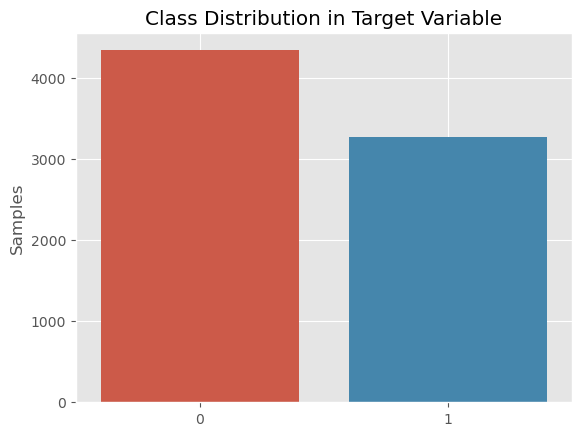

In [9]:
# Class distribution
x = train_df.target.value_counts()

# Create the bar chart using keyword arguments
sns.barplot(x=x.index, y=x)  

# Set the y-axis label
plt.gca().set_ylabel('Samples')

# (Optional) Customize the plot (e.g., title, grid)
plt.title('Class Distribution in Target Variable')
plt.grid(True)

# Display the plot
plt.show()

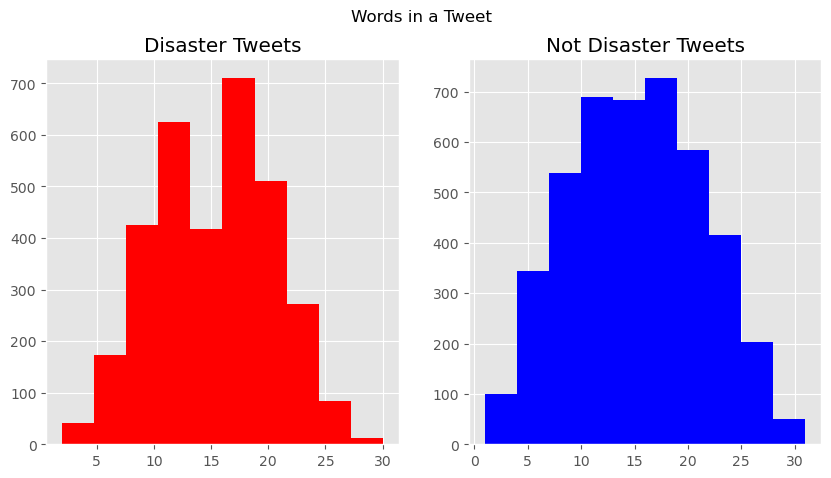

In [10]:
# Number of words in a tweet

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Filter tweets for disaster and non-disaster
disaster_tweets = train_df[train_df['target'] == 1]['text']
non_disaster_tweets = train_df[train_df['target'] == 0]['text']

# Calculate word count for each category
disaster_word_len = disaster_tweets.str.split().map(lambda x: len(x))
non_disaster_word_len = non_disaster_tweets.str.split().map(lambda x: len(x))

# Create histograms on subplots
ax1.hist(disaster_word_len, color='red')
ax1.set_title('Disaster Tweets')  # Capitalize title

ax2.hist(non_disaster_word_len, color='blue')
ax2.set_title('Not Disaster Tweets')  # Capitalize title

# Set the main title of the figure
fig.suptitle('Words in a Tweet')

# Display the plot
plt.show()

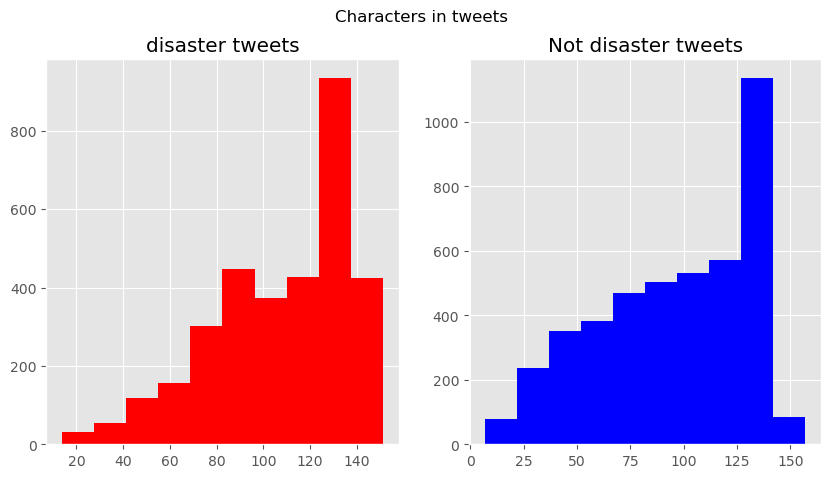

In [11]:
# Number of characters in tweets

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
tweet_len = train_df[train_df['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color = 'red')
ax1.set_title('disaster tweets')

tweet_len = train_df[train_df['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color = 'blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

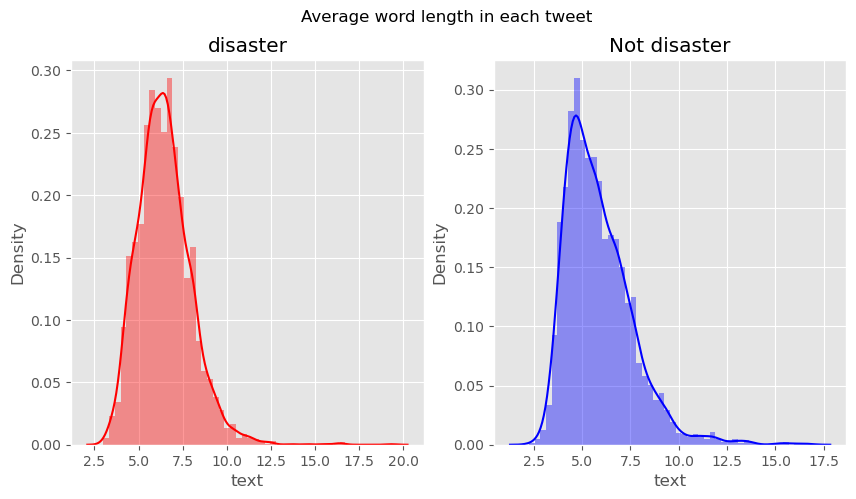

In [12]:
import warnings
warnings.filterwarnings('ignore')
# Average word length in a tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
word_lens = train_df[train_df['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_lens.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('disaster')

word_lens = train_df[train_df['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_lens.map(lambda x: np.mean(x)), ax = ax2, color = 'blue')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

In [13]:
# Method to create corpus

def create_corpus(target):
    corpus = []
    
    for i in train_df[train_df['target'] == target]['text'].str.split():
        for x in i:
            corpus.append(x)
    
    return corpus

In [14]:
# Common stopwords in tweets for target 0

corpus =create_corpus(0)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key = lambda x: x[1], reverse = True)[: 10]

<BarContainer object of 10 artists>

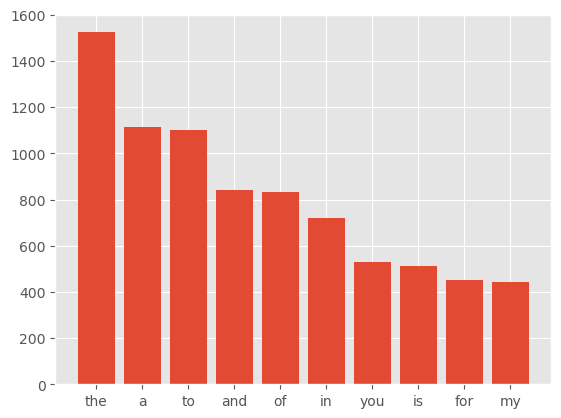

In [15]:
x,y=zip(*top)
plt.bar(x,y)


<BarContainer object of 10 artists>

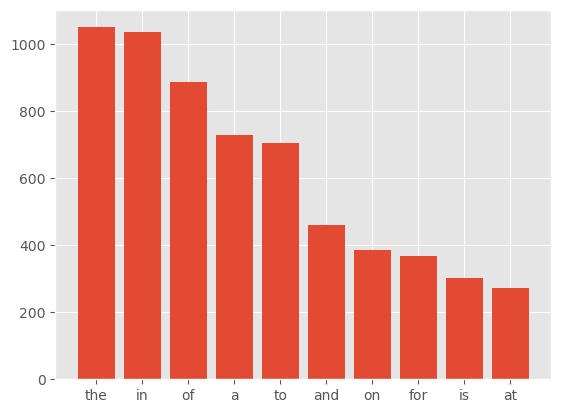

In [16]:
# Common stopwords in tweets for target 1

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y)

<Axes: >

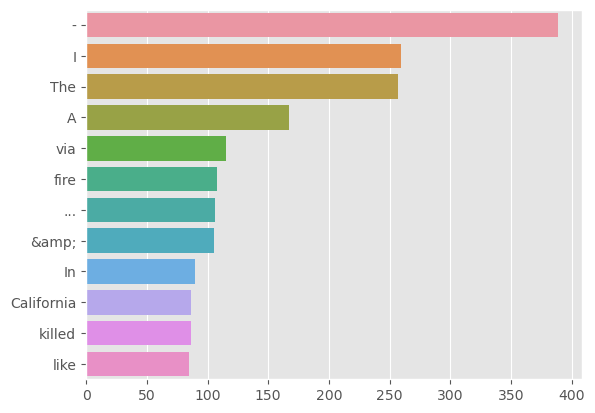

In [17]:
# Most common words
counter = Counter(corpus)
most_common = counter.most_common()

x = []
y = []

for word, count in most_common[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x = y, y = x)

<Axes: >

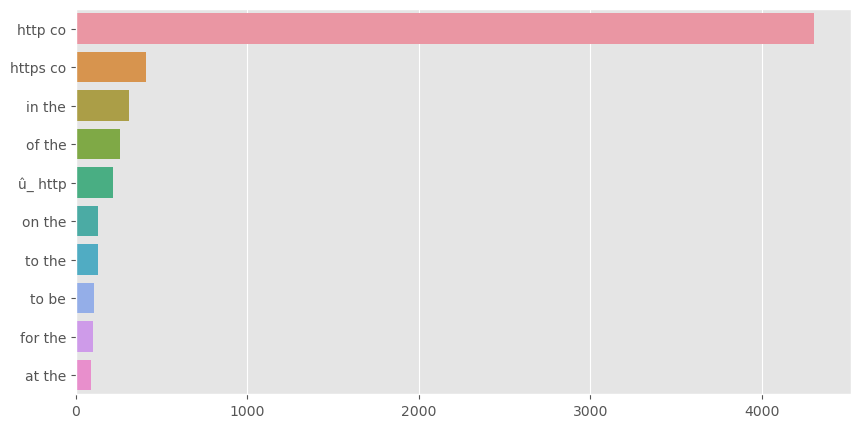

In [18]:
# Bigram analysis
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

# Data Cleaning

In [19]:
df = pd.concat([train_df, test_df])
print(df.shape)
df.sample(5)

(10876, 5)


,id,keyword,location,text,target
2852,9459,terrorism,??????,Online Homeland security: An Appraisal of #Pak...,NaN
1370,4506,emergency,Isle of Patmos,No matter the dilemma emergency nor set-back; ...,NaN
2206,7382,obliterate,FL,Will Trump obliterate opponents as quick as Ro...,NaN
953,1380,body%20bag,New York,New Ladies Shoulder Tote Handbag Women Cross B...,0.0
1544,5158,fatal,Baroda,11-Year-Old Boy Charged With Manslaughter of T...,NaN


In [20]:
# Removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text']=df['text'].apply(lambda x : remove_URL(x))

In [21]:
# Removing HTML tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text'].apply(lambda x : remove_html(x))

In [22]:
# Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [23]:
# Removing punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['text']=df['text'].apply(lambda x : remove_punct(x))

In [24]:
df.sample(10)

,id,keyword,location,text,target
1728,2491,collided,Cherry Creek Denver CO,2 Cars Collide 1 Crashes Into Building Two car...,1.0
2318,7745,police,NaN,Police arrest suspect in killing of Mexican jo...,NaN
7337,10503,wildfire,"Riverside, California.",Is LA at Risk for a Giant Wildfire Which Way ...,1.0
5718,8161,rescuers,NaN,VIDEO Were picking up bodies from water Rescue...,1.0
431,624,arsonist,ss,i be on that hotboy shit,0.0
2816,9357,survived,behind them oranges,Lets see how long i survived b4 i fall back to...,NaN
4330,6150,hijack,Nigeria,Criminals Who Hijack Lorries And Buses Arreste...,1.0
105,153,aftershock,304,There is no victory at bargain basement prices...,0.0
2306,3309,demolished,"NH via Boston, MA",\nColts get demolished by Patriots like 5007 a...,0.0
1191,1716,bridge%20collapse,NaN,Two giant cranes holding a bridge collapse int...,1.0


In [27]:
pip install --upgrade transformers


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/75/35/07c9879163b603f0e464b0f6e6e628a2340cfc7cdc5ca8e7d52d776710d4/transformers-4.44.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ----------------------------------- -- 41.0/43.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 355.5 kB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.23.2 from https://files.pythonhosted.org/packages/b9/8f/d6718641c14d98a5848c6a24d2376028d292074ffade0702940a4b1dde76/huggingface_hub-0.24.6-py3-none-any.whl.metadata
  Obtaining dependency information for safetensors>=0.4.1 from https://files.pythonhosted.org/packages/6d/41/948c96c8a7e9fef57c2e051f1871c108a6dbbc6d285598bdb1d89b98617c/safetensors-0.4.5-cp311-none-win_amd64.whl.metadata
  Obtaining dependency inform

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2024.9.0 which is incompatible.


In [28]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
import warnings
from sklearn.model_selection import train_test_split

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_0 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Convert texts and labels to lists
texts_0 = df['text'].tolist()
labels_0 = df['target'].tolist()

# Tokenize the texts
inputs_0 = tokenizer(texts_0, padding=True, truncation=True, return_tensors="pt")

# Convert labels to tensors
labels_0 = torch.tensor(labels_0)

# Split data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs_0['input_ids'], labels_0, test_size=0.2)

# Define the optimizer
optimizer = AdamW(model_0.parameters(), lr=2e-5)

# Train the model
model_0.train()
for epoch in range(5):  
    optimizer.zero_grad()
    outputs = model_0(input_ids=train_inputs, labels=train_labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Evaluate the model
model_0.eval()
with torch.no_grad():
    outputs = model_0(input_ids=val_inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    print("Predictions:", predictions)


TypeError: 'BertTokenizer' object is not callable